In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
import pickle
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from scipy import stats
import warnings
import catboost
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Supermarket Sales 1/Stores.csv')
#df = pd.read_csv('/content/drive/MyDrive/Data Science/Supermarket Sales 1/random_data.csv')

In [ ]:
df.sample(5)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
292,293,1347,1622,560,44860
653,654,1607,1933,930,81260
435,436,1536,1836,990,52060
837,838,1916,2277,610,55880
445,446,1556,1869,1000,33010


In [ ]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [ ]:
df = df.drop('Store ID ',axis=1)
#df = df.drop('Store_ID',axis=1)

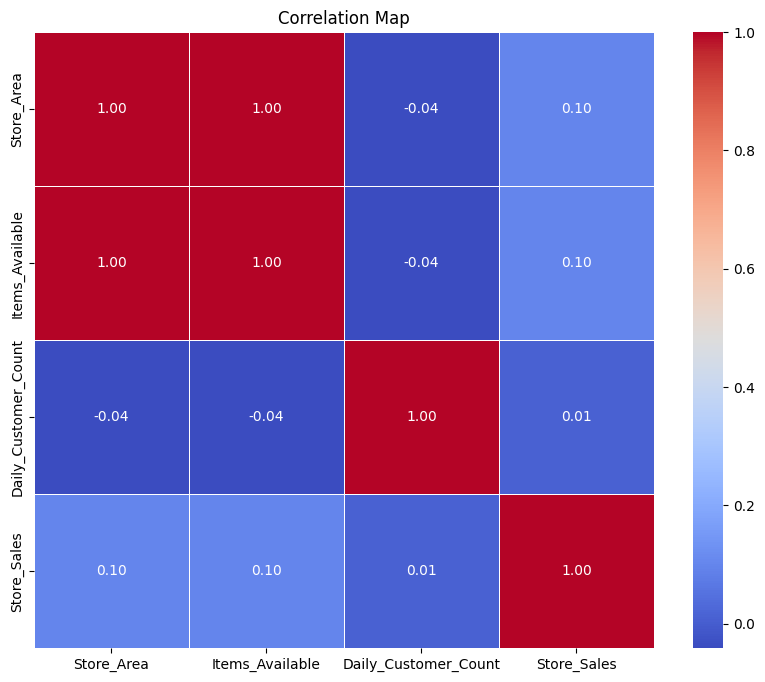

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Map')
plt.show()


In [ ]:
X = df.drop('Store_Sales', axis=1)
y = df['Store_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

,Store_Area,Items_Available,Daily_Customer_Count
736,1098,1309,860
382,1454,1737,870
706,1495,1793,1020
817,1608,1962,770
118,1500,1798,860


In [ ]:
X_train

,Store_Area,Items_Available,Daily_Customer_Count
736,1098,1309,860
382,1454,1737,870
706,1495,1793,1020
817,1608,1962,770
118,1500,1798,860
...,...,...,...
106,1692,2031,810
270,1189,1439,780
860,1249,1510,660
435,1536,1836,990


In [ ]:
X_test

,Store_Area,Items_Available,Daily_Customer_Count
711,1360,1612,490
440,1721,2076,710
525,1001,1194,1210
722,1799,2173,910
39,1270,1516,10
...,...,...,...
845,1419,1743,860
25,1732,2073,820
84,1287,1525,1200
10,1187,1439,1090


In [ ]:
y_train.describe()

count       716.000000
mean      59170.377095
std       17357.070464
min       16370.000000
25%       46190.000000
50%       58385.000000
75%       72127.500000
max      105150.000000
Name: Store_Sales, dtype: float64

In [ ]:
y_train.head()

736    59530
382    23090
706    65300
817    36280
118    56710
Name: Store_Sales, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [ ]:
display(X_train_normalized)

array([[-1.52880457, -1.5587765 ,  0.28805388],
       [-0.1138067 , -0.13796497,  0.32658304],
       [ 0.04915654,  0.04793561,  0.90452039],
       ...,
       [-0.92862289, -0.89152622, -0.48252926],
       [ 0.21211978,  0.19068069,  0.78893292],
       [-0.87695162, -0.92472275,  1.48245775]])

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

model.fit(X_train_normalized,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
predictions = model.predict(X_test_normalized)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 387288562.673854


In [ ]:
Results = pd.DataFrame({'Store_Sales_A':y_test, 'Store_Sales_P':predictions})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = df.merge(Results, left_index=True, right_index=True)
display(ResultsFinal)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Sales_A,Store_Sales_P
5,1442,1733,760,45260,45260,65981.312500
10,1187,1439,1090,71280,71280,63651.187500
23,1449,1752,620,50680,50680,47530.742188
25,1732,2073,820,70050,70050,74106.023438
30,1439,1746,990,80140,80140,54243.929688
...,...,...,...,...,...,...
881,1344,1605,1160,76740,76740,46917.886719
882,1819,2187,590,47920,47920,76825.570312
885,1118,1337,560,72270,72270,65049.027344
890,1549,1851,1220,70620,70620,63063.687500


In [ ]:
px.scatter(Results,'Store_Sales_P','Store_Sales_A',trendline='ols',trendline_color_override='blue',template='plotly_dark',title='Predicted Vs Actual Sales')

In [ ]:
with open('SupermarketSalesML', 'wb') as file:
    pickle.dump(model, file)